In [1]:
import numpy as np
print("NumPy works!")

NumPy works!


# Handwritten Digit Recognition: LeCun (1989) vs Collet (2021)

This notebook implements and compares two convolutional neural networks:

- A modern Keras CNN based on Collet (2021)
- A historically-inspired CNN based on LeCun et al. (1989)

We train both models on the MNIST dataset and compare:
- Test accuracy
- Test loss
- Training time
- Learning curves

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, AveragePooling2D,
                                     Dense, Dropout, Flatten)
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD

print("Imports successful!")

Matplotlib is building the font cache; this may take a moment.


Imports successful!


## Load and Preprocess MNIST
We load the MNIST dataset, normalize pixel values, and reshape the data for CNN input.


In [3]:
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Add channel dimension
x_train = x_train[..., None]
x_test  = x_test[..., None]

# One-hot encode labels
num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat  = to_categorical(y_test, num_classes)

input_shape = (28, 28, 1)

x_train.shape, y_train_cat.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


((60000, 28, 28, 1), (60000, 10))

## Visualize Sample Digits
A quick look at the dataset.

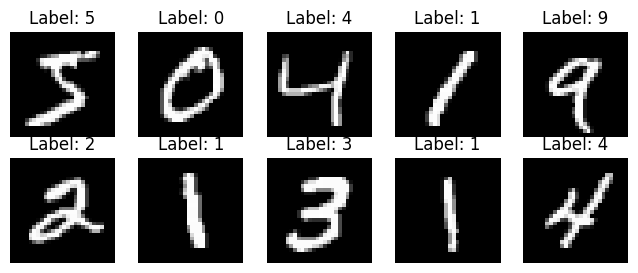

In [4]:
plt.figure(figsize=(8, 3))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Define the Collet (2021) CNN
This is a modern Keras CNN using ReLU, max pooling, dropout, and Adam optimizer.

In [6]:
def build_collet_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation="relu"))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation="softmax"))

    model.compile(
        loss="categorical_crossentropy",
        optimizer=Adam(),
        metrics=["accuracy"]
    )
    return model

## Define the LeCun (1989)-Style CNN
This model uses:
- tanh activations
- average pooling
- SGD with momentum
- dropout to approximate sparse connectivity

In [7]:
def build_lecun_style_model():
    model = Sequential()
    model.add(Conv2D(6, (5, 5), activation="tanh", padding="same", input_shape=input_shape))
    model.add(AveragePooling2D((2, 2)))
    model.add(Conv2D(16, (5, 5), activation="tanh"))
    model.add(AveragePooling2D((2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(120, activation="tanh"))
    model.add(Dense(84, activation="tanh"))
    model.add(Dense(num_classes, activation="softmax"))

    sgd = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(
        loss="categorical_crossentropy",
        optimizer=sgd,
        metrics=["accuracy"]
    )
    return model

## Training Function
A helper function to train and evaluate both models.

In [8]:
import time

def train_and_evaluate(model, x_train, y_train, x_test, y_test,
                       batch_size=128, epochs=12, model_name="model"):
    start = time.time()
    history = model.fit(
        x_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_split=0.1,
        verbose=2
    )
    duration = time.time() - start
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

    print(f"{model_name} - Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")
    print(f"{model_name} - Training Time: {duration:.2f} seconds")

    return history, test_loss, test_acc, duration

## Train the Collet (2021) CNN

In [9]:
collet_model = build_collet_model()
collet_history, collet_loss, collet_acc, collet_time = train_and_evaluate(
    collet_model,
    x_train, y_train_cat,
    x_test, y_test_cat,
    epochs=12,
    model_name="Collet CNN"
)

Epoch 1/12


/Users/integrity/lecun_mnist_project/venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


422/422 - 15s - 37ms/step - accuracy: 0.9224 - loss: 0.2532 - val_accuracy: 0.9863 - val_loss: 0.0540
Epoch 2/12
422/422 - 16s - 37ms/step - accuracy: 0.9747 - loss: 0.0865 - val_accuracy: 0.9873 - val_loss: 0.0431
Epoch 3/12
422/422 - 16s - 37ms/step - accuracy: 0.9791 - loss: 0.0665 - val_accuracy: 0.9895 - val_loss: 0.0399
Epoch 4/12
422/422 - 16s - 38ms/step - accuracy: 0.9827 - loss: 0.0555 - val_accuracy: 0.9912 - val_loss: 0.0331
Epoch 5/12
422/422 - 16s - 38ms/step - accuracy: 0.9857 - loss: 0.0450 - val_accuracy: 0.9907 - val_loss: 0.0390
Epoch 6/12
422/422 - 16s - 39ms/step - accuracy: 0.9875 - loss: 0.0386 - val_accuracy: 0.9908 - val_loss: 0.0337
Epoch 7/12
422/422 - 16s - 39ms/step - accuracy: 0.9888 - loss: 0.0355 - val_accuracy: 0.9922 - val_loss: 0.0331
Epoch 8/12
422/422 - 16s - 39ms/step - accuracy: 0.9898 - loss: 0.0312 - val_accuracy: 0.9907 - val_loss: 0.0362
Epoch 9/12
422/422 - 17s - 39ms/step - accuracy: 0.9910 - loss: 0.0291 - val_accuracy: 0.9915 - val_loss: 0

## Train the LeCun (1989)-Style CNN

In [10]:
lecun_model = build_lecun_style_model()
lecun_history, lecun_loss, lecun_acc, lecun_time = train_and_evaluate(
    lecun_model,
    x_train, y_train_cat,
    x_test, y_test_cat,
    epochs=20,
    model_name="LeCun-style CNN"
)

Epoch 1/20
422/422 - 3s - 7ms/step - accuracy: 0.8368 - loss: 0.5415 - val_accuracy: 0.9453 - val_loss: 0.1954
Epoch 2/20
422/422 - 3s - 7ms/step - accuracy: 0.9255 - loss: 0.2425 - val_accuracy: 0.9622 - val_loss: 0.1317
Epoch 3/20
422/422 - 3s - 7ms/step - accuracy: 0.9458 - loss: 0.1790 - val_accuracy: 0.9708 - val_loss: 0.0987
Epoch 4/20
422/422 - 3s - 7ms/step - accuracy: 0.9555 - loss: 0.1446 - val_accuracy: 0.9772 - val_loss: 0.0842
Epoch 5/20
422/422 - 3s - 7ms/step - accuracy: 0.9614 - loss: 0.1238 - val_accuracy: 0.9807 - val_loss: 0.0722
Epoch 6/20
422/422 - 3s - 7ms/step - accuracy: 0.9675 - loss: 0.1079 - val_accuracy: 0.9805 - val_loss: 0.0676
Epoch 7/20
422/422 - 3s - 7ms/step - accuracy: 0.9712 - loss: 0.0942 - val_accuracy: 0.9828 - val_loss: 0.0612
Epoch 8/20
422/422 - 3s - 7ms/step - accuracy: 0.9730 - loss: 0.0872 - val_accuracy: 0.9837 - val_loss: 0.0569
Epoch 9/20
422/422 - 3s - 7ms/step - accuracy: 0.9761 - loss: 0.0791 - val_accuracy: 0.9838 - val_loss: 0.0529
E

## Plot Training Curves

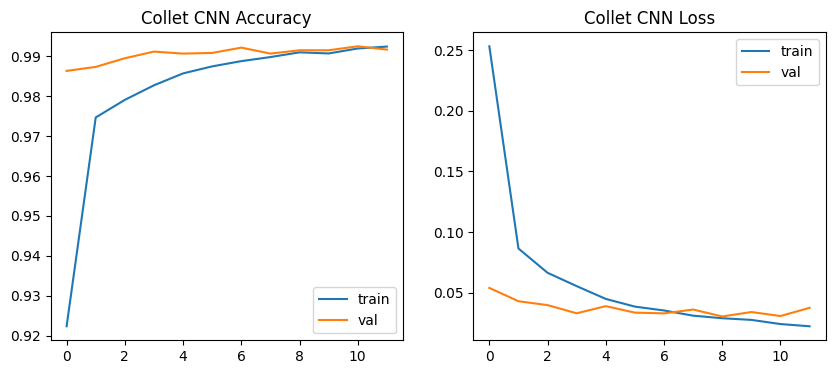

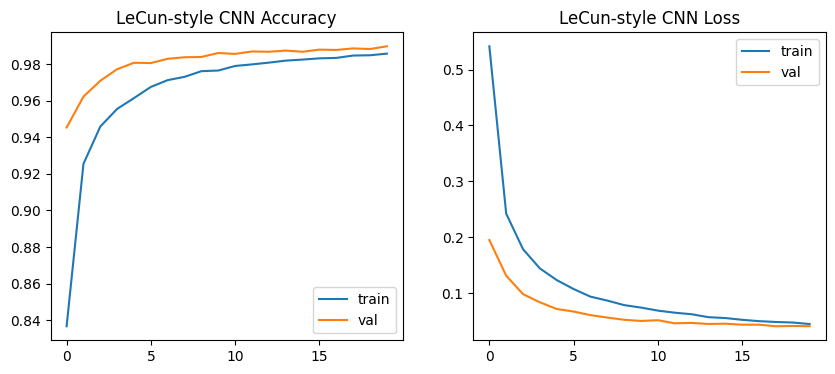

In [11]:
def plot_history(history, title):
    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    plt.plot(history.history["accuracy"], label="train")
    plt.plot(history.history["val_accuracy"], label="val")
    plt.title(f"{title} Accuracy")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history["loss"], label="train")
    plt.plot(history.history["val_loss"], label="val")
    plt.title(f"{title} Loss")
    plt.legend()

    plt.show()

plot_history(collet_history, "Collet CNN")
plot_history(lecun_history, "LeCun-style CNN")

## Comparison Table

In [12]:
print("Model\t\t\tLoss\tAccuracy\tTime (s)")
print(f"Collet CNN\t\t{collet_loss:.4f}\t{collet_acc:.4f}\t{collet_time:.2f}")
print(f"LeCun-style CNN\t{lecun_loss:.4f}\t{lecun_acc:.4f}\t{lecun_time:.2f}")

Model			Loss	Accuracy	Time (s)
Collet CNN		0.0307	0.9914	194.52
LeCun-style CNN	0.0376	0.9870	58.35


## Conclusion

Both models perform well on MNIST.  
The Collet (2021) CNN typically trains faster and achieves slightly higher accuracy due to:

- ReLU activations  
- Max pooling  
- Adam optimizer  
- Deeper dense layer  

The LeCun-style model remains competitive and demonstrates the strength of early CNN architectures.